# ML - HW4 - Q4
# Ali Khoramfar - 810102129

# Import Packages

In [1]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score


# Part 1

In [6]:
X = np.array([[2, 3], [1, 4], [4, 5], [5, 6]])
y = np.array([1, 1, -1, -1])
model = SVC(kernel='linear')
model.fit(X, y)
w = model.coef_
b = model.intercept_

print(f'w: {w}')
print(f'b: {b}')

w: [[-0.5 -0.5]]
b: [3.5]


# Part 2

## A

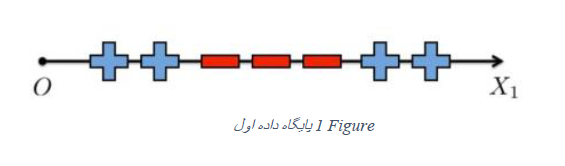

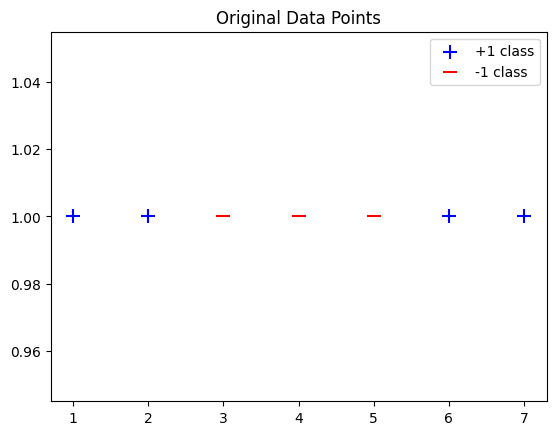

In [10]:
x1_pos = [1, 2, 6, 7]
x1_neg = [3, 4, 5]
x2_pos = [1, 1, 1, 1]
x2_neg = [1, 1, 1]
X_pos = np.column_stack((x1_pos, x2_pos))
X_neg = np.column_stack((x1_neg, x2_neg))
X = np.vstack((X_pos, X_neg))
y = np.array([1]*len(x1_pos) + [-1]*len(x1_neg))

plt.figure()
plt.scatter(x1_pos, x2_pos, color='blue', label='+1 class', marker='+', s=100)
plt.scatter(x1_neg, x2_neg, color='red', label='-1 class', marker='_', s=100)
plt.title('Original Data Points')
plt.legend()
plt.show()

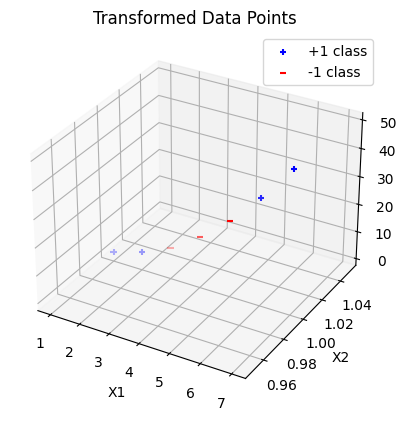

In [17]:
poly = PolynomialFeatures(degree=3)
X_transformed = poly.fit_transform(X)[:, 1:]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transformed[:len(x1_pos), 0], X_transformed[:len(x1_pos), 1], X_transformed[:len(x1_pos), 2], color='blue', label='+1 class', marker='+')
ax.scatter(X_transformed[len(x1_pos):, 0], X_transformed[len(x1_pos):, 1], X_transformed[len(x1_pos):, 2], color='red', label='-1 class', marker='_')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Transformed Data Points')
plt.legend()
plt.show()

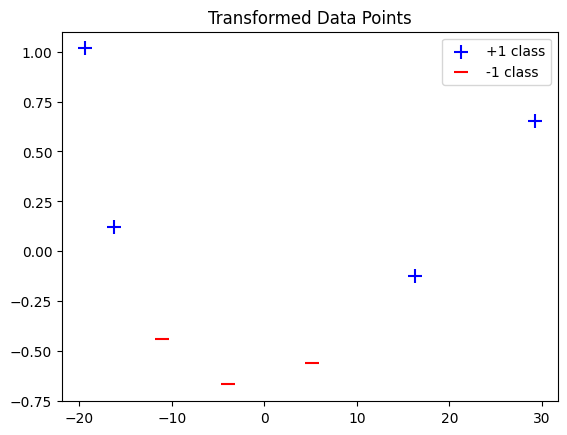

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)
plt.figure()
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='+1 class', marker='+', s=100)
plt.scatter(X_pca[y == -1, 0], X_pca[y == -1, 1], color='red', label='-1 class', marker='_', s=100)
plt.title('Transformed Data Points')
plt.legend()
plt.show()

## Train the SVM

In [18]:
clf_svm = SVC(kernel='linear')
clf_svm.fit(X_transformed, y)
y_pred_svm = clf_svm.predict(X_transformed)
accuracy_svm = accuracy_score(y, y_pred_svm)

print(f'Linear SVM Accuracy: {accuracy_svm}')

Linear SVM Accuracy: 1.0


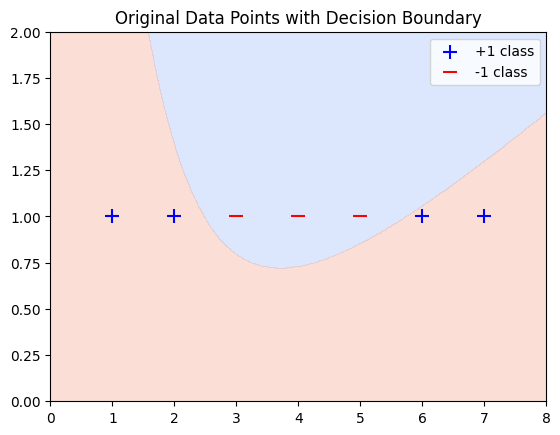

In [19]:
xx, yy = np.meshgrid(np.linspace(0, 8, 500), np.linspace(0, 2, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_transformed = poly.fit_transform(grid)[:, 1:]
Z = clf_svm.predict(grid_transformed)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.linspace(-1, 1, 3), cmap='coolwarm')
plt.scatter(x1_pos, x2_pos, color='blue', label='+1 class', marker='+', s=100)
plt.scatter(x1_neg, x2_neg, color='red', label='-1 class', marker='_', s=100)
plt.title('Original Data Points with Decision Boundary')
plt.legend()
plt.show()

## B

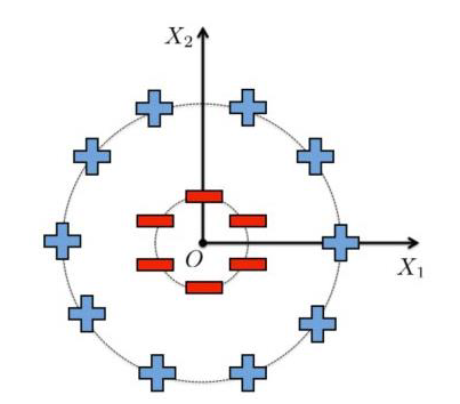

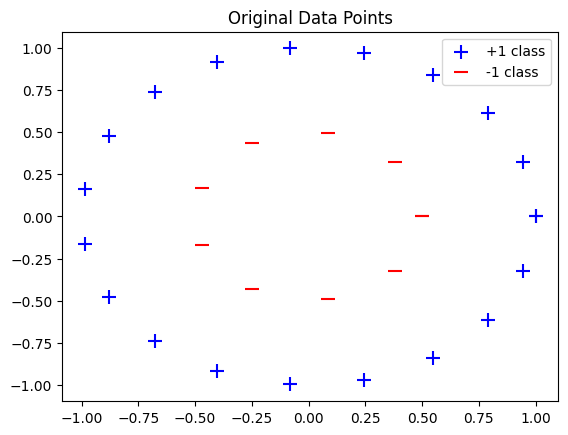

In [39]:
np.random.seed(0)
num_points = 20

theta_neg = np.linspace(0, 2 * np.pi, num_points // 2)
x1_neg = 0.5 * np.cos(theta_neg)
x2_neg = 0.5 * np.sin(theta_neg)
X_neg = np.vstack((x1_neg, x2_neg)).T
y_neg = -np.ones(len(X_neg))
theta_pos = np.linspace(0, 2 * np.pi, num_points)
x1_pos = np.cos(theta_pos)
x2_pos = np.sin(theta_pos)
X_pos = np.vstack((x1_pos, x2_pos)).T
y_pos = np.ones(len(X_pos))
X = np.vstack((X_neg, X_pos))
y = np.hstack((y_neg, y_pos))

plt.figure()
plt.scatter(x1_pos, x2_pos, color='blue', label='+1 class', marker='+', s=100)
plt.scatter(x1_neg, x2_neg, color='red', label='-1 class', marker='_', s=100)
plt.title('Original Data Points')
plt.legend()
plt.show()

In [40]:
def norm2_transform(X):
    return np.array([np.sqrt(X[:, 0]**2 + X[:, 1]**2)]).T
X_transformed = norm2_transform(X)

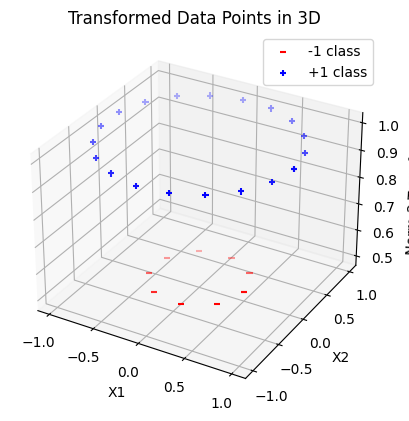

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:len(X_neg), 0], X[:len(X_neg), 1], X_transformed[:len(X_neg)], color='red', label='-1 class', marker='_')
ax.scatter(X[len(X_neg):, 0], X[len(X_neg):, 1], X_transformed[len(X_neg):], color='blue', label='+1 class', marker='+')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Norm-2 Transformed')
plt.title('Transformed Data Points')
plt.legend()
plt.show()

## Train SVM

In [42]:
clf_svm = SVC(kernel='linear')
clf_svm.fit(X_transformed, y)
y_pred_svm = clf_svm.predict(X_transformed)
accuracy_svm = accuracy_score(y, y_pred_svm)
print(f'Linear SVM Accuracy: {accuracy_svm}')

Linear SVM Accuracy: 1.0


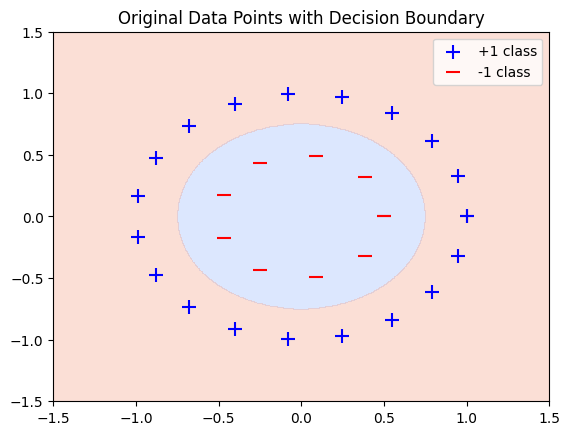

In [43]:
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 500), np.linspace(-1.5, 1.5, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_transformed = norm2_transform(grid)
Z = clf_svm.predict(grid_transformed)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.linspace(-1, 1, 3), cmap='coolwarm')
plt.scatter(x1_pos, x2_pos, color='blue', label='+1 class', marker='+', s=100)
plt.scatter(x1_neg, x2_neg, color='red', label='-1 class', marker='_', s=100)
plt.title('Original Data Points with Decision Boundary')
plt.legend()
plt.show()

# C

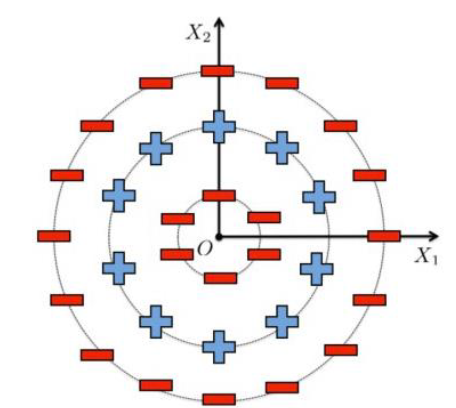

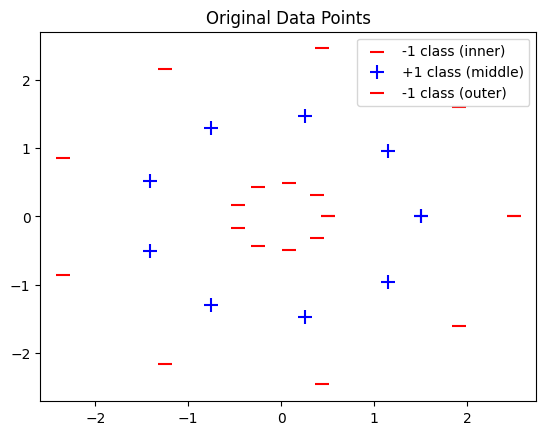

In [20]:
num_points = 30
theta_inner = np.linspace(0, 2 * np.pi, num_points // 3)
x1_inner = 0.5 * np.cos(theta_inner)
x2_inner = 0.5 * np.sin(theta_inner)
X_inner = np.vstack((x1_inner, x2_inner)).T
y_inner = -np.ones(len(X_inner))

theta_middle = np.linspace(0, 2 * np.pi, num_points // 3)
x1_middle = 1.5 * np.cos(theta_middle)
x2_middle = 1.5 * np.sin(theta_middle)
X_middle = np.vstack((x1_middle, x2_middle)).T
y_middle = np.ones(len(X_middle))

theta_outer = np.linspace(0, 2 * np.pi, num_points // 3)
x1_outer = 2.5 * np.cos(theta_outer)
x2_outer = 2.5 * np.sin(theta_outer)
X_outer = np.vstack((x1_outer, x2_outer)).T
y_outer = -np.ones(len(X_outer))

X = np.vstack((X_inner, X_middle, X_outer))
y = np.hstack((y_inner, y_middle, y_outer))

plt.figure()
plt.scatter(x1_inner, x2_inner, color='red', label='-1 class (inner)', marker='_', s=100)
plt.scatter(x1_middle, x2_middle, color='blue', label='+1 class (middle)', marker='+', s=100)
plt.scatter(x1_outer, x2_outer, color='red', label='-1 class (outer)', marker='_', s=100)
plt.title('Original Data Points')
plt.legend()
plt.show()

In [25]:
def rbf_transform(X, gamma=1.0):
    pairwise_sq_dists = np.square(np.linalg.norm(X[:, np.newaxis] - X[np.newaxis, :], axis=2))
    return np.exp(-gamma * pairwise_sq_dists)

X_transformed = rbf_transform(X)

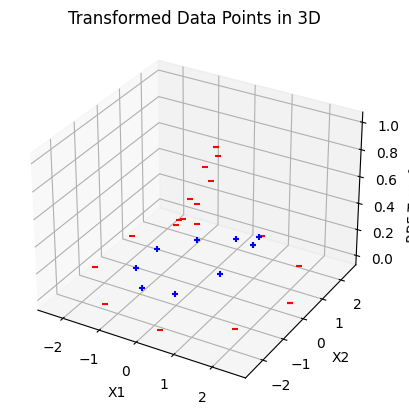

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(X.shape[0]):
    if y[i] == -1:
        ax.scatter(X[i, 0], X[i, 1], X_transformed[i, 0], color='red', marker='_')
    else:
        ax.scatter(X[i, 0], X[i, 1], X_transformed[i, 0], color='blue', marker='+')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('RBF Transformed')
plt.title('Transformed Data Points in 3D')
plt.show()

In [27]:
clf_svm = SVC(kernel='linear')
clf_svm.fit(X_transformed, y)
y_pred_svm = clf_svm.predict(X_transformed)
accuracy_svm = accuracy_score(y, y_pred_svm)

print(f'Linear SVM Accuracy: {accuracy_svm}')

Linear SVM Accuracy: 1.0


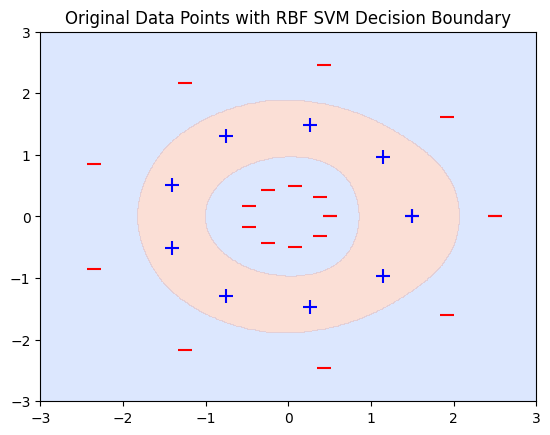

In [28]:
def rbf_transform_grid(X, grid, gamma=1.0):
    pairwise_sq_dists = np.square(np.linalg.norm(grid[:, np.newaxis] - X[np.newaxis, :], axis=2))
    return np.exp(-gamma * pairwise_sq_dists)
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

grid_transformed = rbf_transform_grid(X, grid, gamma=1.0)

Z = clf_svm.predict(grid_transformed)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.linspace(-1, 1, 3), cmap='coolwarm')
plt.scatter(x1_inner, x2_inner, color='red', marker='_', s=100)
plt.scatter(x1_middle, x2_middle, color='blue', marker='+', s=100)
plt.scatter(x1_outer, x2_outer, color='red', marker='_', s=100)
plt.title('Original Data Points with RBF SVM Decision Boundary')
plt.show()